In [1]:
import pandas as pd
import numpy as np
import seaborn as sns;
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore

# 1  Data Understanding & Exploration

1.A Read ‘Car name.csv’ as a DataFrame and assign it to a variable

In [2]:
df1=pd.read_csv("Car Name.csv")

In [3]:
df1.shape

(398, 1)

In [4]:
df1.head()

car_name
0  chevrolet chevelle malibu
1          buick skylark 320
2         plymouth satellite
3              amc rebel sst
4                ford torino

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car_name  398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.

In [6]:
df2=pd.read_json("Car-Attributes.json")

In [7]:
df2.shape

(398, 8)

In [8]:
df2.head()

mpg  cyl   disp   hp    wt   acc  yr  origin
0  18.0    8  307.0  130  3504  12.0  70       1
1  15.0    8  350.0  165  3693  11.5  70       1
2  18.0    8  318.0  150  3436  11.0  70       1
3  16.0    8  304.0  150  3433  12.0  70       1
4  17.0    8  302.0  140  3449  10.5  70       1

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


C. Merge both the DataFrames together to form a single DataFrame

Both Data frames doesn't have common column to merge .But both dataframe has same of rows, so we are merging using Index Columns

In [10]:
df=pd.merge(df1, df2, left_index=True, right_index=True)

In [11]:
df.shape

(398, 9)

In [12]:
df.head()

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


D. Print 5 point summary of the numerical features and share insights. 

In [14]:
df.describe()

mpg         cyl        disp           wt         acc  \
count  398.000000  398.000000  398.000000   398.000000  398.000000   
mean    23.514573    5.454774  193.425879  2970.424623   15.568090   
std      7.815984    1.701004  104.269838   846.841774    2.757689   
min      9.000000    3.000000   68.000000  1613.000000    8.000000   
25%     17.500000    4.000000  104.250000  2223.750000   13.825000   
50%     23.000000    4.000000  148.500000  2803.500000   15.500000   
75%     29.000000    8.000000  262.000000  3608.000000   17.175000   
max     46.600000    8.000000  455.000000  5140.000000   24.800000   

               yr      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000

Each Feature has different units.So std,means values are varying with different units. 
As we are going to do clustering using distances, need to apply scaling before Clustering

# 2.Data Preparation & Analysis

2.A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach

In [15]:
df.isnull().sum() / df.shape[0] * 100.00

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

There is no null records in any feature 

B. Check for duplicate values in the data and impute with the best suitable approach.

In [16]:
duplicate = df[df.duplicated()]
duplicate

Empty DataFrame
Columns: [car_name, mpg, cyl, disp, hp, wt, acc, yr, origin]
Index: []

There is no Duplicate in the data set

 2.C.Plot a pairplot for all features.

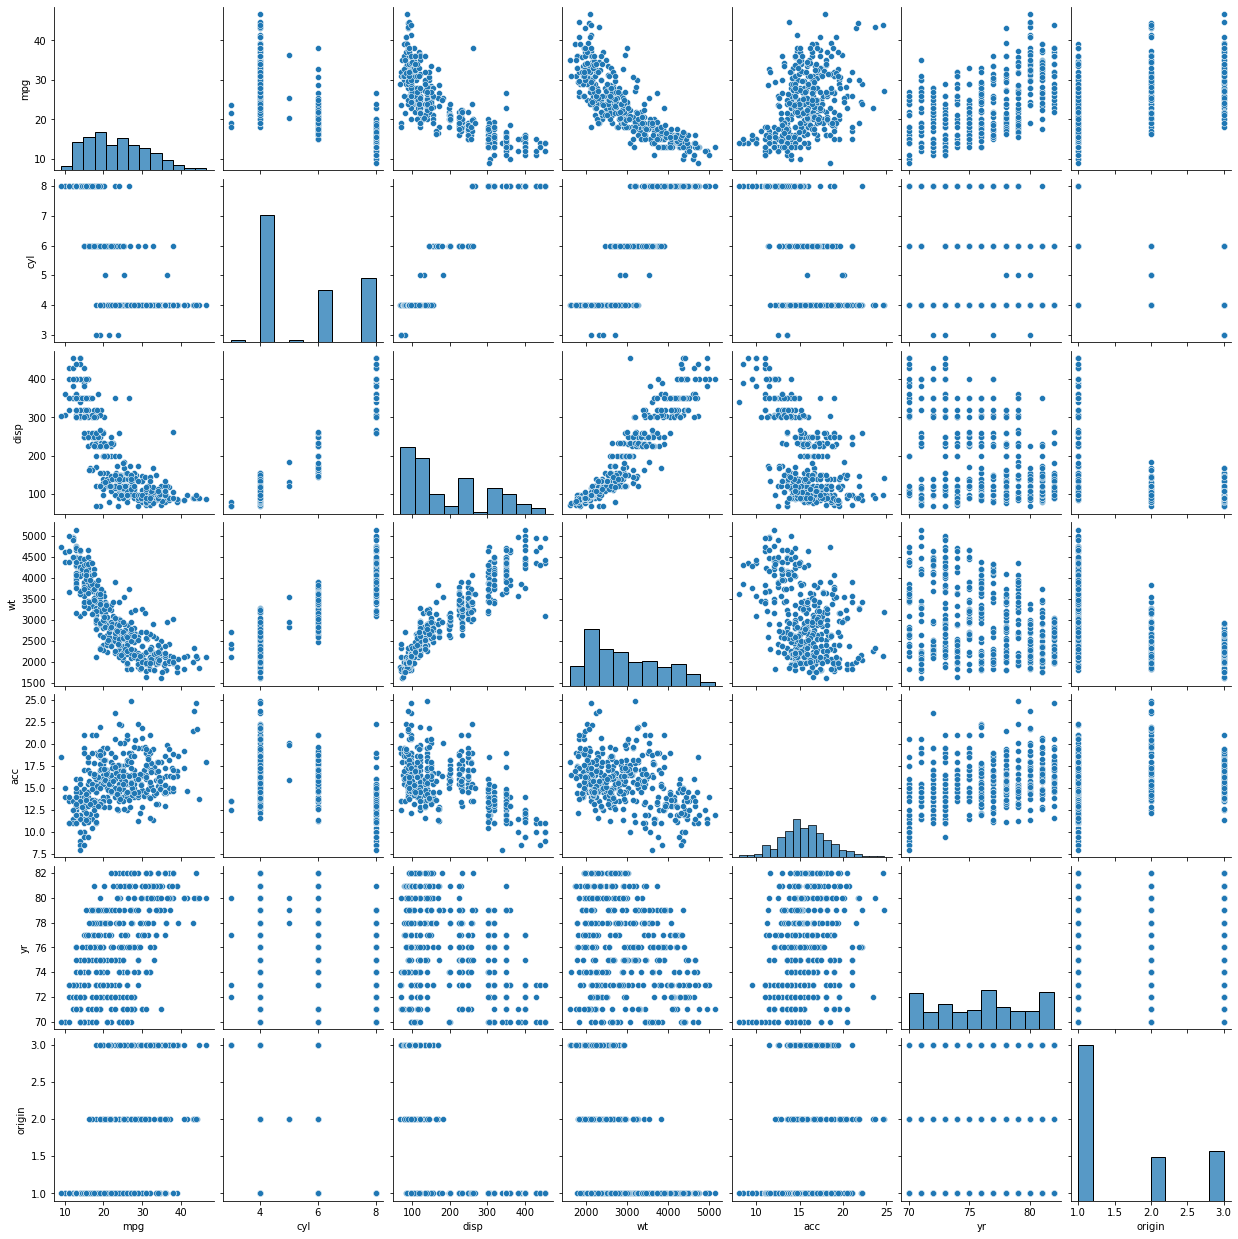

In [17]:
sns.pairplot(df)
plt.show()

2.D Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.

<AxesSubplot:xlabel='wt', ylabel='disp'>

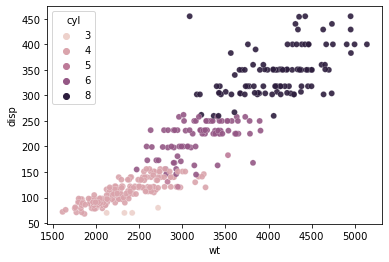

In [18]:
sns.scatterplot(x="wt", y="disp", data=df, hue="cyl", linewidth=0.2, alpha=0.9)

E. Share insights for Q2.d.

It is positive correlation between Wt & disp . It is linear relationship between these 2 features

F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’. 

<AxesSubplot:xlabel='wt', ylabel='mpg'>

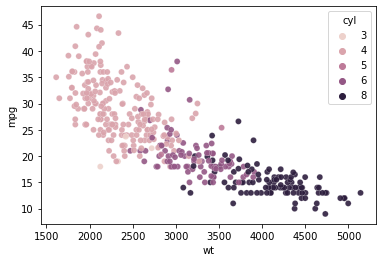

In [19]:
sns.scatterplot(x="wt", y="mpg", data=df, hue="cyl", linewidth=0.2, alpha=0.9)

G. Share insights for Q2.f.

It is Negative  correlation between Wt & mpg which means if weight of car increases then mpg will be decreased.

H. Check for unexpected values in all the features and datapoints with such values.

In [20]:
df.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

Only hp feature has Object Type .But need to convert into Float

In [21]:
df['hp'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

It has ? which is not accepted in Model building.

In [22]:
df.hp = df.hp.apply(lambda x: np.nan if x is "?" else x)
df.hp = df.hp.astype("float32")
df.hp.fillna(df.hp.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    float32
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float32(1), float64(3), int64(4), object(1)
memory usage: 26.6+ KB


<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/7p/5k1s0qxj2mn1kmk2d_npxq8r0000gn/T/ipykernel_18854/3497861081.py:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
  df.hp = df.hp.apply(lambda x: np.nan if x is "?" else x)


In [23]:
df['hp'].unique()

array([130.     , 165.     , 150.     , 140.     , 198.     , 220.     ,
       215.     , 225.     , 190.     , 170.     , 160.     ,  95.     ,
        97.     ,  85.     ,  88.     ,  46.     ,  87.     ,  90.     ,
       113.     , 200.     , 210.     , 193.     , 104.46939, 100.     ,
       105.     , 175.     , 153.     , 180.     , 110.     ,  72.     ,
        86.     ,  70.     ,  76.     ,  65.     ,  69.     ,  60.     ,
        80.     ,  54.     , 208.     , 155.     , 112.     ,  92.     ,
       145.     , 137.     , 158.     , 167.     ,  94.     , 107.     ,
       230.     ,  49.     ,  75.     ,  91.     , 122.     ,  67.     ,
        83.     ,  78.     ,  52.     ,  61.     ,  93.     , 148.     ,
       129.     ,  96.     ,  71.     ,  98.     , 115.     ,  53.     ,
        81.     ,  79.     , 120.     , 152.     , 102.     , 108.     ,
        68.     ,  58.     , 149.     ,  89.     ,  63.     ,  48.     ,
        66.     , 139.     , 103.     , 125.     , 

# 3.Clustering

3.A. Apply K-Means clustering for 2 to 10 clusters. 

In [24]:
df_f=df.iloc[:,1:]

Apply Zscore to scale all the fearures 

In [25]:
df_scale=df_f.apply(zscore)

In [26]:
df_scale.head()

mpg       cyl      disp        hp        wt       acc        yr  \
0 -0.706439  1.498191  1.090604  0.669196  0.630870 -1.295498 -1.627426   
1 -1.090751  1.498191  1.503514  1.586599  0.854333 -1.477038 -1.627426   
2 -0.706439  1.498191  1.196232  1.193427  0.550470 -1.658577 -1.627426   
3 -0.962647  1.498191  1.061796  1.193427  0.546923 -1.295498 -1.627426   
4 -0.834543  1.498191  1.042591  0.931312  0.565841 -1.840117 -1.627426   

     origin  
0 -0.715145  
1 -0.715145  
2 -0.715145  
3 -0.715145  
4 -0.715145

In [28]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(2,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_scale)
    prediction=model.predict(df_scale)
    meanDistortions.append(sum(np.min(cdist(df_scale, model.cluster_centers_, 'euclidean'), axis=1)) / df_scale.shape[0])


In [29]:
prediction

array([4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 7, 7, 7, 8, 3, 3, 3,
       3, 8, 7, 2, 2, 2, 4, 8, 3, 8, 3, 7, 7, 7, 7, 7, 2, 2, 4, 4, 2, 2,
       2, 7, 3, 7, 7, 3, 8, 3, 3, 3, 0, 3, 3, 8, 3, 3, 3, 3, 2, 2, 4, 4,
       4, 2, 4, 4, 2, 8, 4, 4, 4, 4, 8, 3, 3, 3, 3, 8, 8, 3, 8, 4, 4, 4,
       4, 4, 2, 4, 4, 4, 2, 2, 2, 7, 7, 7, 7, 7, 3, 4, 2, 2, 2, 7, 8, 3,
       8, 8, 3, 7, 3, 4, 2, 3, 3, 8, 8, 4, 8, 8, 2, 7, 7, 7, 7, 0, 3, 0,
       3, 7, 1, 7, 4, 4, 4, 4, 4, 3, 3, 8, 0, 0, 3, 3, 8, 8, 8, 3, 7, 7,
       1, 1, 2, 4, 4, 4, 1, 1, 1, 1, 7, 7, 4, 8, 3, 7, 3, 8, 3, 8, 7, 8,
       7, 8, 3, 8, 8, 0, 8, 3, 6, 3, 8, 4, 4, 4, 4, 7, 7, 1, 1, 5, 5, 8,
       0, 1, 1, 1, 1, 8, 0, 8, 6, 8, 4, 5, 8, 1, 4, 4, 4, 4, 0, 6, 0, 6,
       0, 4, 1, 4, 4, 1, 1, 1, 1, 4, 4, 4, 4, 6, 6, 0, 6, 6, 6, 0, 6, 8,
       8, 8, 0, 6, 0, 0, 0, 1, 4, 4, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 4, 4,
       4, 4, 6, 8, 8, 6, 8, 5, 5, 8, 8, 1, 8, 1, 6, 0, 1, 1, 5, 1, 1, 4,
       4, 4, 4, 4, 4, 1, 4, 6, 0, 6, 6, 5, 1, 5, 1,

3.B Plot a visual and find elbow point.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

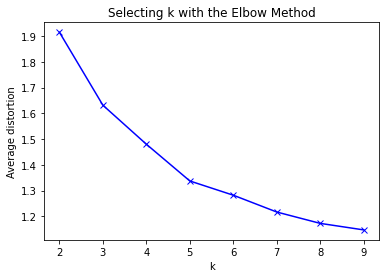

In [30]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

3.C On the above visual, highlight which are the possible Elbow points

Elbow Points will be 5 or 6

3.D in a K-means clustering model once again on the optimal number of clusters

In [31]:
# Let us first start with K = 5
final_model=KMeans(5)
final_model.fit(df_scale)
prediction=final_model.predict(df_scale)


3.E Add a new feature in the DataFrame which will have labels based upon cluster value.

In [32]:

#Append the prediction 
df_scale["GROUP"] = prediction
print("Groups Assigned : \n")
df_scale.sample(10)

Groups Assigned : 



mpg       cyl      disp        hp        wt       acc        yr  \
397  0.958913 -0.856321 -0.714680 -0.588956 -0.296088  1.391285  1.621983   
38  -1.218855  1.498191  1.503514  1.586599  1.464423 -1.295498 -1.356642   
378  1.855641 -0.856321 -0.849116 -1.086975 -0.999583 -0.315185  1.621983   
71  -0.578335 -1.444949 -1.185206 -0.195784 -0.757202 -0.750880 -1.085858   
140 -1.218855  1.498191  1.061796  1.193427  1.521175 -0.024722 -0.544290   
26  -1.731270  1.498191  1.090604  2.504003  1.661874 -0.206262 -1.627426   
347  1.727537 -0.856321 -1.041167 -1.034552 -1.176935  1.391285  1.351199   
314  0.369635 -0.856321 -0.513026 -0.431687 -0.118736  0.919283  1.080415   
257 -0.527093  0.320935  0.370411 -0.379264  0.283261  0.592512  0.538847   
96  -1.346959  1.498191  1.599540  1.848715  1.005673 -1.658577 -0.815074   

       origin  GROUP  
397 -0.715145      4  
38  -0.715145      1  
378 -0.715145      4  
71   1.781589      3  
140 -0.715145      1  
26  -0.715145      1  
347  1.781589      2  
314 -0.715145      4  
257 -0.715145      0  
96  -0.715145      1

In [33]:
df_scale['GROUP'].value_counts()

1    94
3    84
0    81
2    72
4    67
Name: GROUP, dtype: int64

In [34]:
dfClust = df_scale.groupby(['GROUP'])

In [35]:
dfClust.mean()

mpg       cyl      disp        hp        wt       acc        yr  \
GROUP                                                                         
0     -0.564892  0.451742  0.384281 -0.064251  0.387993  0.386319 -0.082954   
1     -1.163797  1.498191  1.503923  1.518282  1.404098 -1.086149 -0.688324   
2      1.360839 -0.807268 -0.901663 -0.820150 -0.963144  0.423579  0.922458   
3      0.141488 -0.828291 -0.814535 -0.489269 -0.736371  0.195719 -0.731260   
4      0.675937 -0.742109 -0.584400 -0.557683 -0.480763  0.356240  0.991501   

         origin  
GROUP            
0     -0.668909  
1     -0.715145  
2      1.486835  
3      0.666976  
4     -0.621983

3.F Plot a visual and color the datapoints based upon clusters. 

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'origin'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>]],
      dtype=object)

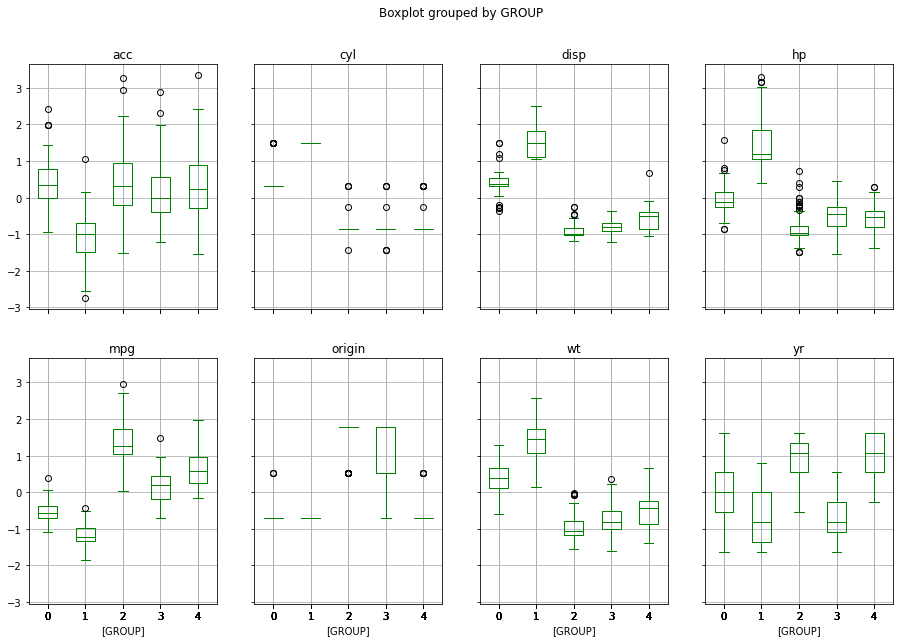

In [36]:
df_scale.boxplot(by='GROUP', color='green',layout = (2,4),figsize=(15,10))

3.G Pass a new DataPoint and predict which cluster it belongs to

In [37]:
new_data_scoring={'mpg':[12.0,13.0],'cyl':[9,8],'disp':[308.0,310.0],'hp':[120.00,130.00],'wt':[3500,4500],'acc':[12.0,13.0],'yr':[75,80],'orgin':[1,2]}

In [38]:
print(type(new_data_scoring))

<class 'dict'>


In [39]:
df_new_data_scoring = pd.DataFrame(new_data_scoring)

In [40]:
df_new_data_scoring.head()

mpg  cyl   disp     hp    wt   acc  yr  orgin
0  12.0    9  308.0  120.0  3500  12.0  75      1
1  13.0    8  310.0  130.0  4500  13.0  80      2

In [41]:
df_new_data_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     2 non-null      float64
 1   cyl     2 non-null      int64  
 2   disp    2 non-null      float64
 3   hp      2 non-null      float64
 4   wt      2 non-null      int64  
 5   acc     2 non-null      float64
 6   yr      2 non-null      int64  
 7   orgin   2 non-null      int64  
dtypes: float64(4), int64(4)
memory usage: 256.0 bytes


Apply Z score on the New Data

In [42]:
df_scale_new=df_new_data_scoring.apply(zscore)

In [43]:
df_scale_new.head()

mpg  cyl  disp   hp   wt  acc   yr  orgin
0 -1.0  1.0  -1.0 -1.0 -1.0 -1.0 -1.0   -1.0
1  1.0 -1.0   1.0  1.0  1.0  1.0  1.0    1.0

In [44]:
prediction=final_model.predict(df_scale_new)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- orgin
Feature names seen at fit time, yet now missing:
- origin

  warnings.warn(message, FutureWarning)


In [45]:
prediction

array([0, 4], dtype=int32)

New DataPoints as per Prediction 

In [46]:
df_new_data_scoring["GROUP"] = prediction
print("Groups Assigned : \n")
df_new_data_scoring.head()

Groups Assigned : 



mpg  cyl   disp     hp    wt   acc  yr  orgin  GROUP
0  12.0    9  308.0  120.0  3500  12.0  75      1      0
1  13.0    8  310.0  130.0  4500  13.0  80      2      4